# Escalamiento de datos numéricos

## Transformaciones lineales

In [18]:
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

### Escalamiento max-min

Detalles del dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [19]:
max_raw = max(raw) #Definir datos máximos de raw
min_raw = min(raw) #Definir datos mínimos de raw
scaled = (2*raw - max_raw -min_raw)/(max_raw - min_raw)

### Normalización Z-score

In [20]:
avg = np.average(raw)
std = np.std(raw)
z_scaled = (raw - avg)/std

**Crear figura y definir axes**

(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

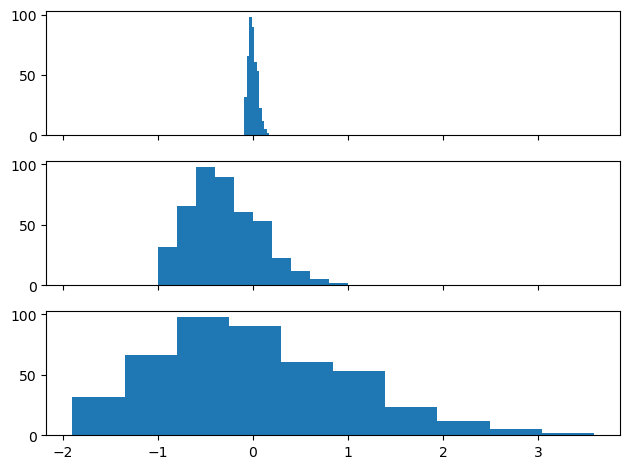

In [21]:
fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True)

axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(z_scaled)

### Modelos para entrenamiento

In [22]:
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

**Medir cuánto tarda el entrenamiento**

In [23]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_raw, number = 100)
z_scaled_time = timeit.timeit(train_raw, number = 100)

print('trainning time for raw data : {} '.format(raw_time))
print('trainning time for scaled data : {}'.format(scaled_time))
print('trainning time for z_scaled data : {}'.format(z_scaled_time))

trainning time for raw data : 0.06977009600086603 
trainning time for scaled data : 0.05302569600462448
trainning time for z_scaled data : 0.05203929700655863


* max-min scaling: mejor para datos uniformemente distribuidos
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

Utilidades de Scikit Learn : https://scikit-learn.org/stable/modules/preprocessing.html

## Transformaciones no lineales

Se usa para distribuciones altamente sesgadas

In [24]:
df = pd.read_csv('cars.csv')

<Axes: >

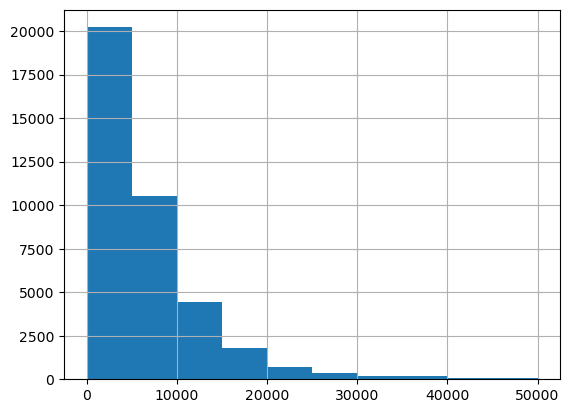

In [25]:
df.price_usd.hist()

### Transformación con tangente hiperbólica $$tanh(x)$$

<Axes: >

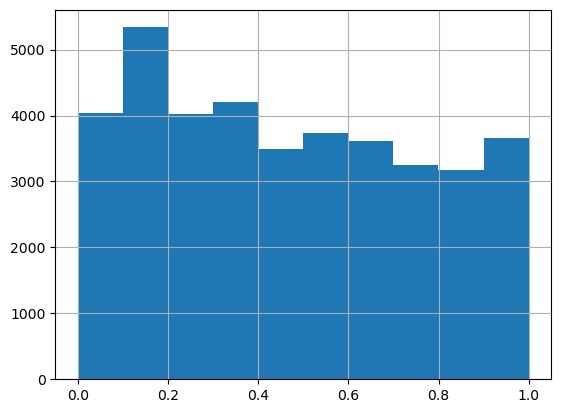

In [26]:
p = 10000 #Número de calibración para la tangente hiperbólica
df.price_usd.apply(lambda x: np.tanh(x/p)).hist() #Transformar toda la columna con base en la función lambda definida (tangente hiperbólica)

* Mapear datos a una distribucion gaussiana: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py